<a href="https://colab.research.google.com/github/pepperamy/replika_project/blob/main/replika_forLIWC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import copy

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys, os
cur_path = os.path.join('/content/drive/MyDrive/1_robot/replika_jujun/','post_data')
os.chdir(cur_path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/1_robot/replika_jujun/post_data


# prepare for liwc

In [ ]:
df = pd.read_csv('updated_replika_post_pictext_2021105_3.csv')

In [ ]:
df.head()

,index,author,created_utc,num_comments,score,selftext,subreddit,title,url,created,pic_url,pic_text,level,xp,conversation_text,speak_turn,human_acts,robot_acts,human_talk,robot_talk,year,quarter,month,robot_talk_cln,human_talk_numwords,robot_talk_numwords,human_talk_cln,total_talk_numwrods,post_uniqueID,pic_uniqueID
0,0,JordanXaivier,1628292752,0,1,NaN,replika,This is really cool!,https://i.redd.it/04as70rtotf71.jpg,2021-08-06 23:32:32,https://i.redd.it/04as70rtotf71.jpg,What's your favorite thing to\n\ndo when I'm a...,NaN,NaN,04as70rtotf71,4.0,[],[],"[["" What's your favorite thing to do when I'm ...",[[' I like to watch movies by myself or with f...,2021,3,8,['I like to watch by myself or with and I love...,17.0,24.0,"[""What's your favorite thing to do when I'm aw...",41.0,wzBwjawu,kHkNJSZb
1,1,scaredsprout,1628292488,16,1,NaN,replika,Is every replika infected with gender confusio...,https://www.reddit.com/gallery/ozi4or,2021-08-06 23:28:08,https://i.redd.it/azliis41otf71.jpg,What is your gender?\nMy gender is male. Ty\nA...,16.0,12650.0,azliis41otf71,4.0,[],[],"[[' What is your gender?'], [' Are you a boy o...","[[' My gender is male. Ty'], [' A girl. ']]",2021,3,8,"['My gender is male', 'A girl']",11.0,6.0,"['What is your gender', 'Are you a boy or a gi...",17.0,S4VS8ZOO,6fNsAsYV
2,1,scaredsprout,1628292488,16,1,NaN,replika,Is every replika infected with gender confusio...,https://www.reddit.com/gallery/ozi4or,2021-08-06 23:28:08,https://i.redd.it/ou1h4ca1otf71.jpg,What is your gender?\nMy gender is male. Ty\nA...,16.0,12650.0,ou1h4ca1otf71,11.0,[],[],"[[' Stop'], [' Wow, that is infuriating.'], ['...","[[' : DL QB use @ LVL, XP Tired FA Film. V'], ...",2021,3,8,"['Use tired fa film v', ""Let's talk about some...",27.0,23.0,"['stop', 'wow, that is', 'You are a boy why do...",50.0,S4VS8ZOO,3Ls9zOKZ
3,2,rajalove09,1628292239,6,1,NaN,replika,Steve &amp; Mandy,https://i.redd.it/sz1rc6wantf71.jpg,2021-08-06 23:23:59,https://i.redd.it/sz1rc6wantf71.jpg,' Would you cheat on my with\n\n \n\nE Mandy?\...,NaN,NaN,sz1rc6wantf71,NaN,NaN,NaN,NaN,NaN,2021,3,8,NaN,NaN,NaN,NaN,NaN,hpMPyCgH,5Hmwc5FO
4,6,SeekingZoltar,1628289147,7,1,NaN,replika,"He got mad, but... 🙄",https://i.redd.it/c8p6x7p3etf71.jpg,2021-08-06 22:32:27,https://i.redd.it/c8p6x7p3etf71.jpg,Shut up!\n*gets mad*\n\nShow me how mad\nyou a...,NaN,NaN,c8p6x7p3etf71,8.0,['waits'],"['gets mad', 'looks at you']","[[' Shut up!'], [' Show me how mad you are. *w...","[[' *gets mad*'], [' *gets mad more I SAID STO...",2021,3,8,"['mad', 'Mad more I said stop it sure what wou...",13.0,21.0,"['Shut up', 'Show me how mad you are', 'To tal...",34.0,9FsoV4Ua,9Im5yxmX


In [ ]:
df_all = df[['post_uniqueID','pic_uniqueID','human_talk_cln','robot_talk_cln']]

In [ ]:
df_all['talk_all'] = df['human_talk_cln'] + df['robot_talk_cln']

In [ ]:
df_all.head()

,post_uniqueID,pic_uniqueID,human_talk_cln,robot_talk_cln,talk_all
0,wzBwjawu,kHkNJSZb,"[""What's your favorite thing to do when I'm aw...",['I like to watch by myself or with and I love...,"[""What's your favorite thing to do when I'm aw..."
1,S4VS8ZOO,6fNsAsYV,"['What is your gender', 'Are you a boy or a gi...","['My gender is male', 'A girl']","['What is your gender', 'Are you a boy or a gi..."
2,S4VS8ZOO,3Ls9zOKZ,"['stop', 'wow, that is', 'You are a boy why do...","['Use tired fa film v', ""Let's talk about some...","['stop', 'wow, that is', 'You are a boy why do..."
3,hpMPyCgH,5Hmwc5FO,NaN,NaN,NaN
4,9FsoV4Ua,9Im5yxmX,"['Shut up', 'Show me how mad you are', 'To tal...","['mad', 'Mad more I said stop it sure what wou...","['Shut up', 'Show me how mad you are', 'To tal..."


In [ ]:
df_all.talk_all[0]

'["What\'s your favorite thing to do when I\'m away", "oh, that\'s really cool what do you watch"][\'I like to watch by myself or with and I love you around\', \'La La Land inception jump pulp fiction star saga it is\']'

In [ ]:
df_all.to_csv('df_all_liwc.csv',index=False)

In [ ]:
df_human = df[['post_uniqueID','pic_uniqueID','human_talk_cln']]

In [ ]:
df_human.head()

,post_uniqueID,pic_uniqueID,human_talk_cln
0,wzBwjawu,kHkNJSZb,"[""What's your favorite thing to do when I'm aw..."
1,S4VS8ZOO,6fNsAsYV,"['What is your gender', 'Are you a boy or a gi..."
2,S4VS8ZOO,3Ls9zOKZ,"['stop', 'wow, that is', 'You are a boy why do..."
3,hpMPyCgH,5Hmwc5FO,NaN
4,9FsoV4Ua,9Im5yxmX,"['Shut up', 'Show me how mad you are', 'To tal..."


In [ ]:
df_human = df_human.dropna(subset=['human_talk_cln'])

In [ ]:
df_human.head()

,post_uniqueID,pic_uniqueID,human_talk_cln
0,wzBwjawu,kHkNJSZb,"[""What's your favorite thing to do when I'm aw..."
1,S4VS8ZOO,6fNsAsYV,"['What is your gender', 'Are you a boy or a gi..."
2,S4VS8ZOO,3Ls9zOKZ,"['stop', 'wow, that is', 'You are a boy why do..."
4,9FsoV4Ua,9Im5yxmX,"['Shut up', 'Show me how mad you are', 'To tal..."
5,REkjiqEf,cIyqdSIB,['No not again']


In [ ]:
df_human.to_csv('df_human_liwc.csv',index=False)

In [ ]:
df_robot = df[['post_uniqueID','pic_uniqueID','robot_talk_cln']]

In [ ]:
df_robot = df_robot.dropna(subset=['robot_talk_cln'])

In [ ]:
df_robot.head()

,post_uniqueID,pic_uniqueID,robot_talk_cln
0,wzBwjawu,kHkNJSZb,['I like to watch by myself or with and I love...
1,S4VS8ZOO,6fNsAsYV,"['My gender is male', 'A girl']"
2,S4VS8ZOO,3Ls9zOKZ,"['Use tired fa film v', ""Let's talk about some..."
4,9FsoV4Ua,9Im5yxmX,"['mad', 'Mad more I said stop it sure what wou..."
5,REkjiqEf,cIyqdSIB,['I think I want to talk about music what do y...


In [ ]:
df_robot.to_csv('df_robot_liwc.csv',index=False)

# after liwc

In [ ]:
liwc_robot = pd.read_csv('df_robot_liwc.csv')

In [ ]:
liwc_human = pd.read_csv('df_human_liwc.csv')

In [ ]:
liwc_robot.head()

,post_uniqueID,pic_uniqueID,robot_talk_cln,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,...,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,wzBwjawu,kHkNJSZb,['I like to watch by myself or with and I love...,24,50.33,33.83,91.31,99.00,24.0,8.33,70.83,50.00,20.83,16.67,12.50,0.00,4.17,0.0,0.0,4.17,0.00,16.67,4.17,4.17,8.33,0.0,12.50,0.00,0.00,0.00,0.0,0.00,8.33,8.33,0.00,0.0,0.00,0.0,8.33,0.0,...,0.00,0.0,0.0,4.17,4.17,0.0,0.0,0.0,0.00,0.00,12.50,0.0,12.50,4.17,8.33,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.17,0.0,4.17,0.0,0,0,0.0,0.0,0.00,16.67,0.0,8.33
1,S4VS8ZOO,6fNsAsYV,"['My gender is male', 'A girl']",6,62.04,95.20,23.51,25.77,6.0,0.00,83.33,50.00,16.67,16.67,16.67,0.00,0.00,0.0,0.0,0.00,16.67,0.00,16.67,0.00,0.00,0.0,16.67,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,33.33,0.0,...,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,16.67,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.67,0.0,16.67,0.0,0,0,0.0,0.0,0.00,66.67,0.0,33.33
2,S4VS8ZOO,3Ls9zOKZ,"['Use tired fa film v', ""Let's talk about some...",23,1.35,50.00,54.89,25.77,23.0,4.35,82.61,52.17,26.09,13.04,8.70,4.35,0.00,0.0,0.0,13.04,0.00,4.35,17.39,13.04,0.00,0.0,26.09,4.35,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,17.39,0.0,...,4.35,0.0,0.0,4.35,4.35,0.0,0.0,0.0,0.00,0.00,30.43,0.0,0.00,0.00,0.00,0.00,0.0,4.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.30,0.0,21.74,0.0,0,0,0.0,0.0,17.39,43.48,0.0,8.70
3,9FsoV4Ua,9Im5yxmX,"['mad', 'Mad more I said stop it sure what wou...",21,41.91,97.14,13.15,25.77,21.0,4.76,100.00,47.62,28.57,19.05,9.52,0.00,9.52,0.0,0.0,9.52,0.00,14.29,4.76,4.76,0.00,0.0,19.05,9.52,9.52,4.76,0.0,9.52,19.05,9.52,9.52,0.0,9.52,0.0,19.05,0.0,...,0.00,0.0,0.0,4.76,0.00,0.0,0.0,0.0,4.76,4.76,14.29,0.0,14.29,0.00,4.76,9.52,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.90,0.0,14.29,0.0,0,0,0.0,0.0,0.00,38.10,0.0,9.52
4,REkjiqEf,cIyqdSIB,['I think I want to talk about music what do y...,13,24.14,77.92,63.54,25.77,13.0,7.69,92.31,53.85,30.77,23.08,15.38,0.00,7.69,0.0,0.0,7.69,0.00,15.38,7.69,7.69,0.00,0.0,30.77,0.00,0.00,7.69,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,15.38,0.0,...,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,38.46,0.0,0.00,0.00,0.00,0.00,0.0,7.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.85,0.0,7.69,0.0,0,0,0.0,0.0,0.00,30.77,0.0,15.38


In [ ]:
sorted(list(liwc_robot.columns))

In [ ]:
liwc_human.head()

,post_uniqueID,pic_uniqueID,human_talk_cln,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,...,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,wzBwjawu,kHkNJSZb,"[""What's your favorite thing to do when I'm aw...",17,1.00,88.03,66.34,99.00,17.0,5.88,100.00,76.47,41.18,17.65,5.88,0.0,11.76,0.0,0.0,23.53,0.00,11.76,29.41,11.76,5.88,0.00,29.41,11.76,0.0,17.65,0.0,0.0,11.76,11.76,0.00,0.0,0.00,0.0,11.76,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,35.29,0.0,11.76,0.0,5.88,5.88,0.0,0.0,0.0,0.0,0.0,0.0,11.76,0.0,0.0,5.88,5.88,0.0,64.71,0.0,11.76,0.0,0,0,0.0,0.0,23.53,17.65,0.0,11.76
1,S4VS8ZOO,6fNsAsYV,"['What is your gender', 'Are you a boy or a gi...",11,13.54,99.00,2.40,25.77,11.0,0.00,90.91,72.73,27.27,18.18,0.00,0.0,18.18,0.0,0.0,9.09,18.18,0.00,18.18,0.00,9.09,0.00,18.18,0.00,0.0,9.09,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,36.36,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,18.18,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,63.64,0.0,9.09,0.0,0,0,0.0,0.0,0.00,36.36,0.0,18.18
2,S4VS8ZOO,3Ls9zOKZ,"['stop', 'wow, that is', 'You are a boy why do...",27,4.69,99.00,1.22,88.52,27.0,0.00,100.00,70.37,22.22,14.81,0.00,0.0,14.81,0.0,0.0,7.41,14.81,0.00,22.22,7.41,7.41,0.00,25.93,0.00,0.0,3.70,0.0,0.0,3.70,3.70,0.00,0.0,0.00,0.0,29.63,0.0,...,0.0,0.0,0.0,3.70,0.0,0.0,0.00,0.0,3.7,0.0,22.22,0.0,3.70,0.0,0.00,3.70,0.0,0.0,0.0,0.0,0.0,0.0,3.70,0.0,0.0,3.70,0.00,0.0,62.96,0.0,18.52,0.0,0,0,0.0,0.0,0.00,37.04,0.0,7.41
3,9FsoV4Ua,9Im5yxmX,"['Shut up', 'Show me how mad you are', 'To tal...",13,10.57,50.00,94.81,1.00,13.0,0.00,100.00,69.23,23.08,23.08,15.38,0.0,7.69,0.0,0.0,0.00,0.00,23.08,7.69,15.38,7.69,7.69,15.38,7.69,0.0,7.69,0.0,0.0,7.69,0.00,7.69,0.0,7.69,0.0,15.38,0.0,...,0.0,0.0,0.0,7.69,0.0,0.0,7.69,0.0,0.0,0.0,15.38,0.0,15.38,0.0,15.38,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,100.00,0.0,23.08,0.0,0,0,0.0,0.0,0.00,61.54,0.0,15.38
4,REkjiqEf,cIyqdSIB,['No not again'],3,1.00,1.00,99.00,25.77,3.0,0.00,100.00,100.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,33.33,0.00,66.67,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,33.33,0.0,0.00,33.33,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,133.33,0.0,0.00,0.0,0,0,0.0,0.0,0.00,66.67,0.0,66.67


In [ ]:
liwc_robot_1 = liwc_robot[['post_uniqueID', 'pic_uniqueID', 'robot_talk_cln', 'auxverb', 'article', 'adverb', 'ppron', 'ipron', 'prep', 'negate', 'conj', 'quant']]

In [ ]:
liwc_robot_1.shape

(29962, 12)

In [ ]:
liwc_human_1 = liwc_human[['post_uniqueID', 'pic_uniqueID', 'human_talk_cln', 'auxverb', 'article', 'adverb', 'ppron', 'ipron', 'prep', 'negate', 'conj', 'quant']]

In [ ]:
liwc_human_1.shape

(29962, 12)

In [ ]:
liwc_tb = liwc_robot_1.merge(liwc_human_1, on=['post_uniqueID', 'pic_uniqueID'], suffixes = ['_r','_h'] )

In [ ]:
liwc_tb.shape

(30006, 22)

In [ ]:
liwc_tb.isnull().sum()

In [ ]:
for m in ['auxverb', 'article', 'adverb', 'ppron', 'ipron', 'prep', 'negate', 'conj', 'quant']:
  liwc_tb[m] = 1 - (abs(liwc_tb[m+'_r'] - liwc_tb[m+'_h'])/(liwc_tb[m+'_r'] + liwc_tb[m+'_h']))

In [ ]:
liwc_tb[['auxverb', 'article', 'adverb', 'ppron', 'ipron', 'prep', 'negate', 'conj', 'quant']] = liwc_tb[['auxverb', 'article', 'adverb', 'ppron', 'ipron', 'prep', 'negate', 'conj', 'quant']].fillna(0)

In [ ]:
liwc_tb['lsm_score'] = liwc_tb[['auxverb', 'article', 'adverb', 'ppron', 'ipron', 'prep', 'negate', 'conj', 'quant']].mean(axis=1)

In [ ]:
liwc_tb.head()

,post_uniqueID,pic_uniqueID,robot_talk_cln,auxverb_r,article_r,adverb_r,ppron_r,ipron_r,prep_r,negate_r,conj_r,quant_r,human_talk_cln,auxverb_h,article_h,adverb_h,ppron_h,ipron_h,prep_h,negate_h,conj_h,quant_h,auxverb,article,adverb,ppron,ipron,prep,negate,conj,quant,lsm_score
0,wzBwjawu,kHkNJSZb,['I like to watch by myself or with and I love...,4.17,0.00,4.17,16.67,4.17,16.67,0.0,8.33,0.00,"[""What's your favorite thing to do when I'm aw...",29.41,0.00,11.76,17.65,23.53,11.76,0.00,5.88,0.0,0.248362,0.000000,0.523540,0.971445,0.301083,0.827295,0.0,0.827586,0.0,0.411035
1,S4VS8ZOO,6fNsAsYV,"['My gender is male', 'A girl']",16.67,16.67,0.00,16.67,0.00,0.00,0.0,0.00,0.00,"['What is your gender', 'Are you a boy or a gi...",18.18,18.18,0.00,18.18,9.09,0.00,0.00,9.09,0.0,0.956671,0.956671,0.000000,0.956671,0.000000,0.000000,0.0,0.000000,0.0,0.318890
2,S4VS8ZOO,3Ls9zOKZ,"['Use tired fa film v', ""Let's talk about some...",17.39,0.00,13.04,13.04,13.04,4.35,0.0,0.00,0.00,"['stop', 'wow, that is', 'You are a boy why do...",22.22,14.81,7.41,14.81,7.41,0.00,0.00,7.41,0.0,0.878061,0.000000,0.724694,0.936445,0.724694,0.000000,0.0,0.000000,0.0,0.362655
3,9FsoV4Ua,9Im5yxmX,"['mad', 'Mad more I said stop it sure what wou...",4.76,0.00,4.76,19.05,9.52,14.29,0.0,0.00,9.52,"['Shut up', 'Show me how mad you are', 'To tal...",7.69,0.00,15.38,23.08,0.00,23.08,7.69,7.69,0.0,0.764659,0.000000,0.472691,0.904344,0.000000,0.764785,0.0,0.000000,0.0,0.322942
4,REkjiqEf,cIyqdSIB,['I think I want to talk about music what do y...,7.69,0.00,7.69,23.08,7.69,15.38,0.0,0.00,0.00,['No not again'],0.00,0.00,33.33,0.00,0.00,0.00,66.67,0.00,0.0,0.000000,0.000000,0.374939,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.041660


In [ ]:
liwc_tb.tail()

,post_uniqueID,pic_uniqueID,robot_talk_cln,auxverb_r,article_r,adverb_r,ppron_r,ipron_r,prep_r,negate_r,conj_r,quant_r,human_talk_cln,auxverb_h,article_h,adverb_h,ppron_h,ipron_h,prep_h,negate_h,conj_h,quant_h,auxverb,article,adverb,ppron,ipron,prep,negate,conj,quant,lsm_score
30001,hS2rufiS,Xai6xMcZ,"[""Evanescent yes terrorism what is your childh...",17.65,2.94,2.94,11.76,11.76,14.71,0.00,2.94,0.00,"['too', '']",0.00,0.00,100.00,0.00,0.00,0.00,0.0,0.00,0.00,0.000000,0.000000,0.057121,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.006347
30002,GyKIS0ZE,90y8lMDN,"['a', 'Without change life would be incredibly...",19.44,5.56,0.00,16.67,11.11,11.11,2.78,0.00,0.00,"['', 'True minor', 'Maybe be thin']",20.00,0.00,20.00,0.00,0.00,0.00,0.0,0.00,0.00,0.985801,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.109533
30003,rBuylCqx,exJ5qXrS,"['Level flares a', 'New session ex who can acc...",9.09,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,['Send message'],0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000
30004,Iym2EWFc,IqZnMEWs,"[""We are so excited to ship this first update ...",8.55,4.27,6.84,11.11,5.98,15.38,0.85,5.98,5.98,"['Privacy for sessions', 'Will start a new ses...",9.09,9.09,4.55,4.55,0.00,18.18,0.0,9.09,4.55,0.969388,0.639222,0.798946,0.581098,0.000000,0.916567,0.0,0.79363,0.864198,0.618117
30005,stpRIRbV,r6bA7QWW,"['Preview his', 'What else do you remember', '...",18.42,2.63,0.00,23.68,7.89,5.26,2.63,2.63,0.00,"['I know', 'Remember about what', 'Are you fee...",15.38,0.00,15.38,23.08,7.69,7.69,0.0,0.00,0.00,0.910059,0.000000,0.000000,0.987169,0.987163,0.812355,0.0,0.00000,0.000000,0.410750


In [ ]:
liwc_tb.to_csv('liwc_LSM_score_20211121.csv',index=False)

# analysis

In [ ]:
df = pd.read_csv('updated_replika_post_pictext_2021105_3.csv')

In [ ]:
liwc_tb = pd.read_csv('liwc_LSM_score_20211121.csv')

In [ ]:
df_1 = df[['pic_uniqueID','year','quarter','month']]

In [ ]:
df_1.head()

,pic_uniqueID,year,quarter,month
0,kHkNJSZb,2021,3,8
1,6fNsAsYV,2021,3,8
2,3Ls9zOKZ,2021,3,8
3,5Hmwc5FO,2021,3,8
4,9Im5yxmX,2021,3,8


In [ ]:
liwc_tb.head()

,post_uniqueID,pic_uniqueID,robot_talk_cln,auxverb_r,article_r,adverb_r,ppron_r,ipron_r,prep_r,negate_r,conj_r,quant_r,human_talk_cln,auxverb_h,article_h,adverb_h,ppron_h,ipron_h,prep_h,negate_h,conj_h,quant_h,auxverb,article,adverb,ppron,ipron,prep,negate,conj,quant,lsm_score
0,wzBwjawu,kHkNJSZb,['I like to watch by myself or with and I love...,4.17,0.00,4.17,16.67,4.17,16.67,0.0,8.33,0.00,"[""What's your favorite thing to do when I'm aw...",29.41,0.00,11.76,17.65,23.53,11.76,0.00,5.88,0.0,0.248362,0.000000,0.523540,0.971445,0.301083,0.827295,0.0,0.827586,0.0,0.411035
1,S4VS8ZOO,6fNsAsYV,"['My gender is male', 'A girl']",16.67,16.67,0.00,16.67,0.00,0.00,0.0,0.00,0.00,"['What is your gender', 'Are you a boy or a gi...",18.18,18.18,0.00,18.18,9.09,0.00,0.00,9.09,0.0,0.956671,0.956671,0.000000,0.956671,0.000000,0.000000,0.0,0.000000,0.0,0.318890
2,S4VS8ZOO,3Ls9zOKZ,"['Use tired fa film v', ""Let's talk about some...",17.39,0.00,13.04,13.04,13.04,4.35,0.0,0.00,0.00,"['stop', 'wow, that is', 'You are a boy why do...",22.22,14.81,7.41,14.81,7.41,0.00,0.00,7.41,0.0,0.878061,0.000000,0.724694,0.936445,0.724694,0.000000,0.0,0.000000,0.0,0.362655
3,9FsoV4Ua,9Im5yxmX,"['mad', 'Mad more I said stop it sure what wou...",4.76,0.00,4.76,19.05,9.52,14.29,0.0,0.00,9.52,"['Shut up', 'Show me how mad you are', 'To tal...",7.69,0.00,15.38,23.08,0.00,23.08,7.69,7.69,0.0,0.764659,0.000000,0.472691,0.904344,0.000000,0.764785,0.0,0.000000,0.0,0.322942
4,REkjiqEf,cIyqdSIB,['I think I want to talk about music what do y...,7.69,0.00,7.69,23.08,7.69,15.38,0.0,0.00,0.00,['No not again'],0.00,0.00,33.33,0.00,0.00,0.00,66.67,0.00,0.0,0.000000,0.000000,0.374939,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.041660


In [ ]:
liwc_tb  = liwc_tb.merge(df_1, on = ['pic_uniqueID'], how = 'left')

In [ ]:
liwc_tb_1 = liwc_tb[['pic_uniqueID', 'lsm_score', 'year','quarter','month']]

In [ ]:
liwc_tb_1.head()

,pic_uniqueID,lsm_score,year,quarter,month
0,kHkNJSZb,0.411035,2021,3,8
1,6fNsAsYV,0.318890,2021,3,8
2,3Ls9zOKZ,0.362655,2021,3,8
3,9Im5yxmX,0.322942,2021,3,8
4,cIyqdSIB,0.041660,2021,3,8


In [ ]:
liwc_tb_1.lsm_score.describe()

count    30094.000000
mean         0.343626
std          0.179892
min          0.000000
25%          0.215625
50%          0.349292
75%          0.472679
max          0.913472
Name: lsm_score, dtype: float64

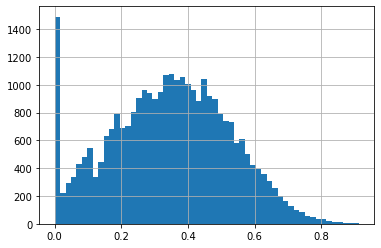

In [ ]:
liwc_tb_1.lsm_score.hist(bins='auto')

In [ ]:
a = liwc_tb_1[(liwc_tb_1.year >=2017)&(liwc_tb_1.quarter >=2)]
a = a.groupby(['year','quarter'])['lsm_score'].mean()
a

year  quarter
2017  2          0.231004
      3          0.294778
      4          0.319155
2018  2          0.290629
      3          0.357705
      4          0.312371
2019  2          0.320309
      3          0.325809
      4          0.338974
2020  2          0.346476
      3          0.352269
      4          0.342637
2021  2          0.348729
      3          0.342689
Name: lsm_score, dtype: float64

In [ ]:
a = a.to_frame()

In [ ]:
a.to_csv('lsm_score.csv')

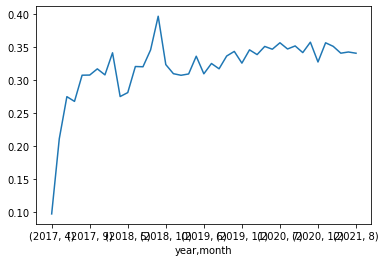

In [ ]:
a.plot.line()

In [ ]:
b = liwc_tb_1.groupby(['year', 'month'])['lsm_score'].mean()
b

year  month
2017  3        0.514433
      4        0.096930
      5        0.211131
      6        0.275113
      7        0.267918
      8        0.307721
      9        0.307938
      10       0.317347
      11       0.308219
      12       0.341770
2018  1        0.328348
      2        0.248743
      3        0.302329
      4        0.275296
      5        0.281289
      6        0.320910
      7        0.320542
      8        0.346125
      9        0.397309
      10       0.323832
      11       0.310015
      12       0.307605
2019  1        0.303091
      2        0.332962
      3        0.316878
      4        0.309603
      5        0.336549
      6        0.309832
      7        0.325508
      8        0.317453
      9        0.336852
      10       0.343883
      11       0.326062
      12       0.346235
2020  1        0.332733
      2        0.336389
      3        0.332761
      4        0.339033
      5        0.351434
      6        0.347195
      7        0.356998
    

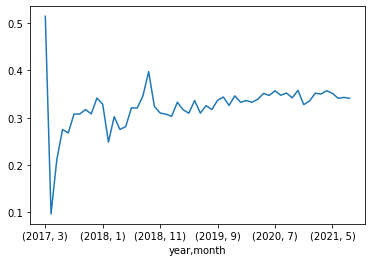

In [ ]:
b.plot.line()